# Regresión

Los **problemas de regresión** son problemas de aprendizaje supervisado en los cuales la variable objetivo es continua. Dicho con otras palabras, lo que se intenta realizar cuando se aplica **regresión** es predecir el valor que tendrá una determinada característica objetivo en función de los valores de otras características.

## Librerías
Además de los módulos de regresión de [scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html), a lo largo de esta libreta vamos a utilizar otras librerías adicionales:

* [Pandas](https://pandas.pydata.org/) para el almacenamiento y tratamiento de los datos.
* [Seaborn](https://seaborn.pydata.org/tutorial.html) es una librería para la creación de gráfica, con la que se complementará a [Matplotlib](https://matplotlib.org/3.2.1/tutorials/index.html)
* La librería numérica **Numpy**

In [ ]:
# Imports
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
import numpy as np

## Un primer ejemplo: consumo de combustible

Te han suministrado un conjunto de datos que recoje información sobre las características de distintos modelos de coche. El conjunto de datos se obtiene del [repositorio de UCI](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

In [ ]:
dataset_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names, comment='\t', sep=" ", skipinitialspace=True)
raw_dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.00,2790.0,15.6,82,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2
395,32.0,4,135.0,84.00,2295.0,11.6,82,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1
397,31.0,4,119.0,82.00,2720.0,19.4,82,1


Como se puede observar, hay características tanto continuas como discretas. La descripción de estas características, según recoje la web del conjunto de datos, es la siguiente:

> Attribute Information:
> 1. mpg: continuous
> 2. cylinders: multi-valued discrete
> 3. displacement: continuous
> 4. horsepower: continuous
> 5. weight: continuous
> 6. acceleration: continuous
> 7. model year: multi-valued discrete
> 8. origin: multi-valued discrete
> 9. car name: string (unique for each instance)

La variable interesante aquí es `MPG`, que representa la cantidad de millas que el modelo de vehículo es capaz de recorrer en ciudad por cada galón de combustible.

Usando la librería *Seaborn* es posible visualizar gráficamente la relación que hay entre algunas de las características del modelo de coche y su consumo:

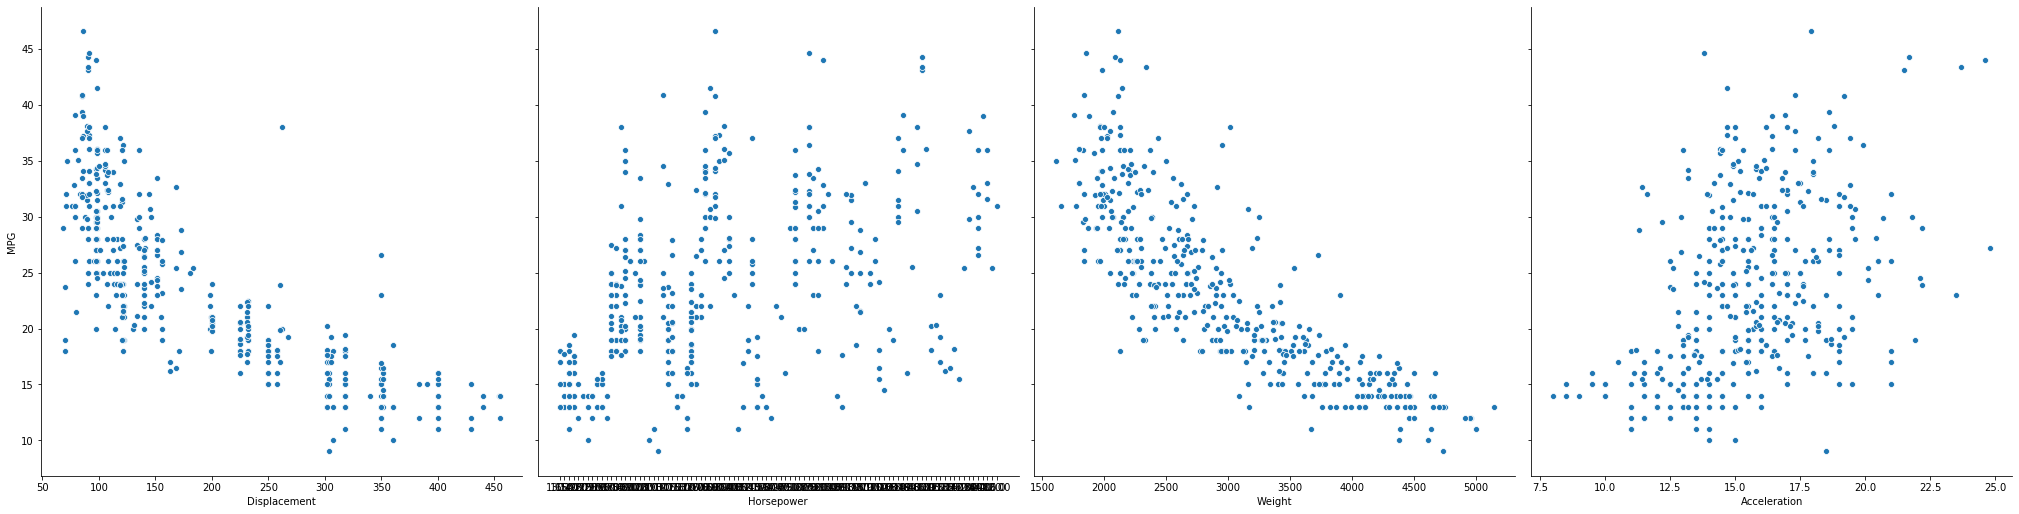

In [ ]:
sns.pairplot(raw_dataset, x_vars=['Displacement','Horsepower','Weight', 'Acceleration'], y_vars='MPG', height=7)

A la vista de estas relaciones, **¿serías capaz de predecir un valor de consumo para un nuevo modelo de vehículo, sabiendo su cilindrada, potencia, peso y/o aceleración?**

## Regresión lineal
La **regresión lineal** es un enfoque para predecir una **respuesta cuantitativa** usando una única característica o variable de entrada. Este modelo toma la siguiente forma:

$$y=\beta_0 + \beta_1 x$$

donde $y$ es la respuesta que se predice, $x$ es el valor de entrada del modelo (la característica) y $\beta_0, \beta_1$ los coeficientes del modelo.

Prestando atención a la forma que toma el modelo, parece claro que este modelo es una recta con pendiente $\beta_1$ y un valor $\beta_0$ de corte con el eje y, también conocido como *intercept*.

Por lo tanto, para que un modelo de **regresión lineal** sea bueno con sus predicciones lo único que habrá que hacer es encontrar un valor óptimo para esos coeficientes.

### Estimando ("aprendiendo") los coeficientes del modelo

En términos generales, los coeficientes se estiman usando el **criterio de mínimos cuadrados**, lo que significa que se está buscando matemáticamente la línea que minimiza la **suma de los errores al cuadrado**, es decir, minimizar el siguiente valor:

$$sse=\sum^{N}_{i=1}(\widehat{y}_i - y_i)^2$$

Una representación gráfica tanto del propio modelo como de los errores sería la siguiente:

![](https://i.imgur.com/aufgJLC.png)

donde la línea azul se corresponde con el modelo con los coeficientes ya estimados y los segmentos en rojo se corresponderían con los errores cometidos por dicho modelo. Fíjate que los puntos negros representan las observaciones que tenemos de nuestras variables de entrada y salida.

Con respecto a los coeficientes $\beta_0, \beta_1$ del modelo, estos se corresponderían con el punto de corte con el eje y (*intercept*) y la pendiente (*slope*):

![](https://i.imgur.com/xI8semp.png)

Vamos a entrenar un modelo de **regresión lineal** para predecir el consumo de un nuevo modelo de coche en función de su peso. Para ello vamos a usar el método `LinearRegression` de [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn-linear-model-linearregression). Observando la documentación, será necesario proporcionarle a este método los valores de la variable de entrada `Weight` así como los valores observados de la salida `MPG`:

In [ ]:
lm_peso = LinearRegression()
# Se espera una matrix de entrada
X = np.array(raw_dataset['Weight']).reshape(-1,1)
y = np.array(raw_dataset['MPG'])
lm_peso.fit(X, y)

print('Coeficientes del modelo: intercept=%f slope=%f' % (lm_peso.intercept_, lm_peso.coef_[0]))

Coeficientes del modelo: intercept=46.317364 slope=-0.007677


Una vez tenemos los coeficientes del modelo de **regresión lineal** podríamos calcular las predicciones de dicho modelo aplicando directamente la ecuación. Convertimos la ecuación en una función de *Python*:

$$MPG = 46.317346 - 0.007677\times peso$$

In [ ]:
def predecir_MPG_con_peso(peso):
    return 46.317364 - 0.007677 * peso

Y predecimos cuántas millas por galón recorrerá un nuevo modelo de coche cuyo peso es, por ejemplo, de 3750:

In [ ]:
predecir_MPG_con_peso(3750)

17.528613999999997

Obviamente, podemos usar el modelo de *scikit-learn* ya entrenado para calcular predicciones, usando el método `predict()`:

In [ ]:
lm_peso.predict(np.array([2134,3750,4500]).reshape(-1,1))

array([29.93547854, 17.53007668, 11.77261913])

In [ ]:
lm_peso.predict(np.array([223,327,392]).reshape(-1,1))

array([44.60548038, 43.80711293, 43.30813328])

### Representación gráfica del modelo de regresión lineal

Vamos a utilizar la librería gráfica *Seaborn* para representar un ajuste de regresión lineal para cada una de las variables de entrada continuas que tenemos:

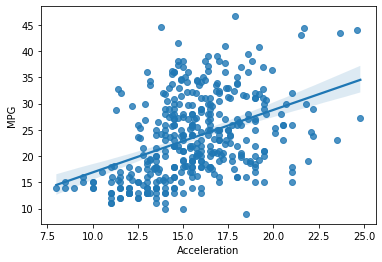

In [ ]:
sns.regplot(raw_dataset['Acceleration'], raw_dataset['MPG'])

### Midiendo la calidad del modelo

La forma más común de evaluar el ajuste global de un modelo lineal es por el valor $R^2$. $R^2$ es la proporción de la varianza explicada, es decir, la proporción de la varianza en los datos observados que es explicada por el modelo, o la reducción del error sobre el modelo nulo. (El modelo nulo sólo predice la media de la respuesta observada, y por lo tanto tiene un *intercept* pero no una pendiente).

$R^2$ está entre 0 y 1, y más alto es mejor porque significa que el modelo explica más varianza.

Vamos a comprobar el valor de $R^2$ para el modelo calculado anteriormente:

In [ ]:
lm_peso.score(X, y)

0.6917929800341575

Entonces, ¿es un buen ajuste o no? Es difícil de determinar si usamos exclusivamente el valor de $R^2$. Esta métrica es más apropiada para comparar distintos modelos entre ellos, más que para dar una respuesta sobre la calidad del ajuste en términos absolutos.

## Regresión lineal múltiple

La **regresión lineal** simple se puede extender fácilmente para incluir varias características de entrada en lugar de una sola. A esto se le conoce como **regresión lineal múltiple** y toma la siguiente forma:

$$y=\beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n$$

donde ahora tenemos $n$ *features* de entrada y, por tanto, $n+1$ coeficientes a entrenar.

Vamos a construir un modelo de **regresión lineal múltiple** que tenga en cuenta algunas de las variables continuas del conjunto de datos que nos ha sido proporcionado:

In [ ]:
features = ['Displacement','Weight','Acceleration']
lm_global = LinearRegression()
lm_global.fit(raw_dataset[features], raw_dataset.MPG)

print(lm_global.intercept_)
print(lm_global.coef_)

41.29907558557766
[-0.01089526 -0.00618888  0.17385071]


Como era de esperar, si necesitamos calcular una predicción con el nuevo modelo de regresión lineal múltiple, tendremos que proporcionar qué valores de desplazamiento, peso y aceleración tiene el nuevo modelo de coche para el cual estamos prediciendo su consumo de combustible:

In [ ]:
lm_global.predict(np.array([180, 2100, 8]).reshape(1, -1))

array([27.73208675])

Podemos hacer una comparación rápida entre el modelo que hemos entrenado usando una única variable y el nuevo modelo que tiene en cuenta tres:

In [ ]:
print('R2 del modelo de una variable: ', lm_peso.score(X, y))
print('R2 del modelo con tres variables: ', lm_global.score(raw_dataset[features], raw_dataset.MPG))

R2 del modelo de una variable:  0.6917929800341575
R2 del modelo con tres variables:  0.700393633244106


## Métricas de evaluación para regresión

Además de $R^2$ existen otras métricas para evaluar la calidad de los modelos de regresión. Las más utilizadas son las siguientes:

* **Mean Absolute Error (MAE)** es la media de los valores absolutos de los errores
$$\frac{1}{n}\sum^{n}_{i=1}\left | y_i - \widehat{y}_i  \right |$$

* **Mean Squared Error (MSE)** es la media de los cuadrados de los errores
$$\frac{1}{n}\sum^{n}_{i=1}\left ( y_i - \widehat{y}_i  \right )^2$$

* **Root Mean Squared Error (RMSE)** es la raíz cuadrada de la media de los errores al cuadrado
$$\sqrt{\frac{1}{n}\sum^{n}_{i=1}\left ( y_i - \widehat{y}_i  \right )^2}$$

Todas estas métricas están implementadas en [scikit-learn](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics). Vamos a calcularlas para los dos modelos de **regresión lineal** que hemos ajustado:

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Modelo lm_peso:")
print("MAE: ", mean_absolute_error(raw_dataset['MPG'], lm_peso.predict(X)))
print("MSE: ", mean_squared_error(raw_dataset['MPG'], lm_peso.predict(X)))
print("RMSE: ", mean_squared_error(raw_dataset['MPG'], lm_peso.predict(X), squared=False))
print("")
print("Modelo lm_global:")
print("MAE: ", mean_absolute_error(raw_dataset['MPG'], lm_global.predict(raw_dataset[features])))
print("MSE: ", mean_squared_error(raw_dataset['MPG'], lm_global.predict(raw_dataset[features])))
print("RMSE: ", mean_squared_error(raw_dataset['MPG'], lm_global.predict(raw_dataset[features]), squared=False))

Modelo lm_peso:
MAE:  3.292788793526055
MSE:  18.780939734628394
RMSE:  4.333698159150957

Modelo lm_global:
MAE:  3.2803037251409553
MSE:  18.256849304655752
RMSE:  4.272803447931551


El *MSE* es más popular que el *MAE* porque "castiga" los errores más grandes. Esto quiere decir que es una métrica más exigente con respecto a la calidad del modelo. Por otro lado, la *RMSE* es aún más popular que la *MSE* porque sus resultados son interpretables en unidades de la variable de salida.

En el caso de nuestro ejemplo, se puede afirmar que nuestro modelo `lm_global` falla en su predicción por 4.2720 millas por galón de media.

## Otro ejemplo

> Una importante inmobiliaria ha solicitado tus servicios para construir un modelo que sea capaz de determinar el precio de venta al que tendría que salir una vivienda en base a sus características

Se te ha proporcionado un conjunto de datos de unas 20000 viviendas. Entre la información incluida se encuentra el valor mediano de las casas de un determinado distrito así como distintas características agrupadas de las mismas.

In [ ]:
raw_data = fetch_california_housing()

Vamos a echar un vistazo a las características sobre las viviendas que se incluyen en el conjunto de datos:

In [ ]:
print('Características: ', ', '.join(raw_data.feature_names))

Características:  MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude


Las características incluidas son las siguientes:

* `MedInc` es el ingreso mediano.
* `HouseAge` es la antigüedad mediana en años.
* `AveRooms` es el número medio de habitaciones.
* `AveBedrms` es el número medio de dormitorios.
* `Population` población del distrito.
* `AveOccup` es la ocupación media de las casas.
* `Latitude` latitud posicional del distrito.
* `Longitude` longitud posicional del distrito.

Por su parte, la variable objetivo es el valor mediano de las casas del distrito **en unidades de $100000**.

Vamos a almacenar la información en un *Dataframe*:

In [ ]:
X = pd.DataFrame(data=raw_data.data, columns=raw_data.feature_names)
X.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


No nos podemos olvidar de la variable objetivo:

In [ ]:
Y = pd.DataFrame(data=raw_data.target, columns=['MedianHouseValue'])
Y.head()

,MedianHouseValue
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


Usando *Seaborn* podemos generar varias gráficas para explorar las posibles relaciones entre las características de las viviuendas y su valor mediano:

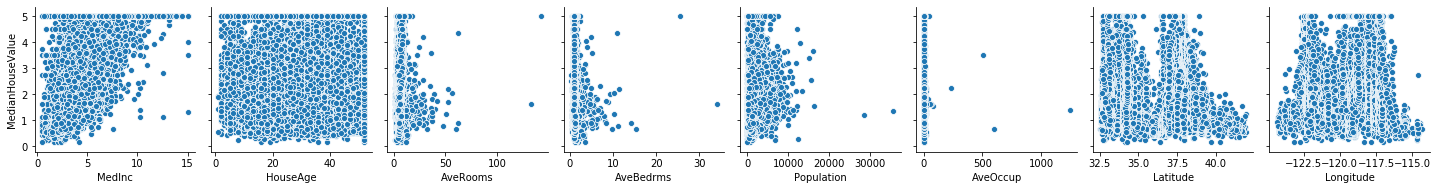

In [ ]:
sns.pairplot(pd.concat([X,Y], axis=1), x_vars=raw_data.feature_names, y_vars='MedianHouseValue')

Un primer enfoque para solucionar este problema de **regresión** puede ser construir un modelo de **regresión lineal** que tenga en cuenta todas las variables que tenemos en el conjunto de datos:

In [ ]:
modelo = LinearRegression()
modelo.fit(X, Y)

print('Modelo global:')
print('\tR2: ', modelo.score(X, Y))
print('\tRMSE: ', mean_squared_error(Y, modelo.predict(X), squared=False))

Modelo global:
	R2:  0.6062326851998049
	RMSE:  0.7241001216576387


Observamos que se consigue un valor de $R^2=0.6062$, es decir, el modelo es capaz de explicar el $60.62\%$ de la varianza de los datos. Si nos fijamos en el *RMSE*, observamos que el modelo se equivoca de media en $0.72$ unidades cuando da la predicción. Aunque pueda parecer un error pequeño, hay que recordar que las unidades en la variable de salida eran 100,000 dólares, por lo que el modelo se está equivocando de media en 72,410 dólares al predecir el precio de una vivienda.

Para intentar mejorar estos datos, vamos a realizar un estudio sobre qué conjunto de variables es el más adecuado para utilizar en un modelo de **regresión lineal** para predecir el precio de las viviendas. Para ello seguiremos un enfoque de 'fuerza bruta', entrenando un modelo para cada combinación de variables de entrada de las que disponemos en el conjunto de datos:

In [ ]:
variables = raw_data.feature_names

# La función combinations calcula todas las combinaciones posibles de elementos en un iterable
from itertools import combinations

combinaciones = map(lambda r: combinations(variables, r), range(1, len(variables) + 1))

# Aplana una lista de listas para convertirla en una lista 'a secas'
flatten = lambda l: [item for sublist in l for item in sublist]

combinaciones = flatten(combinaciones)

# Sacamos por pantalla todas las posibles combinaciones
for c in combinaciones:
    print(c)

('MedInc',)
('HouseAge',)
('AveRooms',)
('AveBedrms',)
('Population',)
('AveOccup',)
('Latitude',)
('Longitude',)
('MedInc', 'HouseAge')
('MedInc', 'AveRooms')
('MedInc', 'AveBedrms')
('MedInc', 'Population')
('MedInc', 'AveOccup')
('MedInc', 'Latitude')
('MedInc', 'Longitude')
('HouseAge', 'AveRooms')
('HouseAge', 'AveBedrms')
('HouseAge', 'Population')
('HouseAge', 'AveOccup')
('HouseAge', 'Latitude')
('HouseAge', 'Longitude')
('AveRooms', 'AveBedrms')
('AveRooms', 'Population')
('AveRooms', 'AveOccup')
('AveRooms', 'Latitude')
('AveRooms', 'Longitude')
('AveBedrms', 'Population')
('AveBedrms', 'AveOccup')
('AveBedrms', 'Latitude')
('AveBedrms', 'Longitude')
('Population', 'AveOccup')
('Population', 'Latitude')
('Population', 'Longitude')
('AveOccup', 'Latitude')
('AveOccup', 'Longitude')
('Latitude', 'Longitude')
('MedInc', 'HouseAge', 'AveRooms')
('MedInc', 'HouseAge', 'AveBedrms')
('MedInc', 'HouseAge', 'Population')
('MedInc', 'HouseAge', 'AveOccup')
('MedInc', 'HouseAge', 'Latit

Una vez generadas todas las posibles combinaciones de variables, bastará con entrenar un modelo de **regresión lineal** para cada una de ellas y calcular las medidas de calidad que se obtienen. Para poder analizarlas, se almacenarán en un *Dataframe* de *Pandas*:

In [ ]:
r2 = []
mae = []
mse = []
rmse = []

for c in combinaciones:
    m = LinearRegression()
    
    # Si solo hay una variable, hay que ponerlo en forma de matriz n x 1
    if len(c)<2:
        xs = np.array(X.loc[:,c]).reshape(-1, 1)
    else:
        xs = X.loc[:,c]
    m.fit(xs, Y)
    r2.append(m.score(xs, Y))
    mae.append(mean_absolute_error(Y, m.predict(xs)))
    mse.append(mean_squared_error(Y, m.predict(xs)))
    rmse.append(mean_squared_error(Y, m.predict(xs), squared=False))

resultados = pd.DataFrame({
    'Combinación': combinaciones,
    'R2': r2,
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse
})

Ya tenemos todas las medidas de calidad para el modelo de **regresión lineal** ajustado para cada combinación de variables de entrada posibles en `resultados`.

Para visualizar `resultados` de una forma un poco más interactiva y que nos permita ordenar por columnas vamos a utilizar una pequeña librería que se llama `qgrid`, que muestra en una libreta de Jupyter los *dataframes* de *Pandas* con una serie de herramientas adicionales. Puedes consultar su documentación en su [repositorio de GitHub](https://github.com/quantopian/qgrid).

In [ ]:
import qgrid
qgrid_widget = qgrid.show_grid(resultados)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Evaluación justa de los modelos

Hasta ahora hemos estado calculando las medidas de calidad de los modelos con el mismo conjunto de datos que se ha usado para su entrenamiento. Si bien evaluar los modelos de esta forma nos puede dar una aproximación de la dificultad que ha tenido el modelo para entrenarse, es una evaluación **nada justa** del modelo, puesto que estamos evaluando su rendimiento pidiendo que nos calcule la predicción de **los mismos datos** con los que ha realizado el ajuste. Por tanto, estamos confundiendo **rendimiento** con **overfitting**.

Para realizar una evaluación más justa de cualquier modelo de *Machine Learning* se utiliza la división del conjunto de datos en dos conjuntos: uno para **entrenamiento** y otro para **test**.

La idea básica es reservar un porcentaje de los datos de entrada para utilizarlos posteriormente en la fase de evaluación del modelo. Estos datos, al no participar en el entrenamiento del mismo, pueden considerarse como datos futuros. Por lo tanto, comprobar qué tal se comporta el modelo intentando predecir los datos de **test** es una forma justa de evaluar la capacidad de generalizar del modelo, lo que a fin de cuentas es la principal característica cuando se trata de *Machine Learning*.

Un detalle importante es el mecanismo utilizado para realizar la división del conjunto de datos. Si se realiza *a mano* estamos inevitablemente introduciendo un sesgo en el proceso, ya que podría suceder que el subconjunto seleccionado no sea representativo del conjunto total. Por ello se suele dividir el conjunto de datos mediante un muestreo **aleatorio**.

*Scikit-learn* cuenta con una función para realizar la partición mediante muestreo aleatorio del conjunto de datos de entrada en dos subconjuntos, uno de entrenamiento y otro de test. La función en cuestión es `train_test_split`, y se encuentra en el módulo `model_selection`.

Vamos a repetir la evaluación de las combinaciones de variables para el conjunto de datos del precio de las casas, aunque utilizando la división de los datos en entrenamiento y test:

In [ ]:
from sklearn.model_selection import train_test_split

r2 = []
mae = []
mse = []
rmse = []

# Partición en entrenamiento/test con un 30% de las muestras al conjunto de test
# Se fija la semilla del generador de números aleatorios para tener resultados consistentes en el notebook
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7777)

for c in combinaciones:
    m = LinearRegression()
    
    # Si solo hay una variable, hay que ponerlo en forma de matriz n x 1
    if len(c)<2:
        xs = np.array(X_train.loc[:,c]).reshape(-1, 1)
        xs_test = np.array(X_test.loc[:,c]).reshape(-1, 1)
    else:
        xs = X_train.loc[:,c]
        xs_test = X_test.loc[:,c]
    m.fit(xs, Y_train)
    r2.append(m.score(xs_test, Y_test))
    mae.append(mean_absolute_error(Y_test, m.predict(xs_test)))
    mse.append(mean_squared_error(Y_test, m.predict(xs_test)))
    rmse.append(mean_squared_error(Y_test, m.predict(xs_test), squared=False))

resultados = pd.DataFrame({
    'Combinación': combinaciones,
    'R2': r2,
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse
})
qgrid_widget = qgrid.show_grid(resultados)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Cross-validation (validación cruzada)

Aunque hemos dado un gran paso hacia una evaluación más justa de los modelos, todavía hay algunos detalles que se pueden mejorar. Y es que, si la separación del *dataset* en entrenamiento y test se realiza mediante un muestreo aleatorio, podría suceder que por casualidad todas las muestras que vayan al conjunto de test sean todas casas de 3 habitaciones, por poner un ejemplo. De esta forma se estaría introduciendo un sesgo en el proceso.

Una forma de mitigar esto es realizar $K$ separaciones diferentes y aleatorias, calcular las medidas de calidad de cada una de estas separaciones y luego agruparlas con alguna función de agregación (media, mediana, ...). Este proceso se conoce como **K-fold cross-validation** y se puede considerar casi un estándar a la hora de evaluar el rendimiento de un modelo de aprendizaje computacional.

La siguiente imagen muestra un proceso de 5-fold cross-validation, donde se observa que cada iteración usa unos conjuntos de entrenamiento y test distintos:

![](https://i.imgur.com/R6nj4E9.png)

*Scikit-learn* cuenta con herramientas para realizar validación cruzada a la hora de evaluar los modelos. A continuación vamos a realizar la evaluación del modelo que tiene en cuenta todas las variables de entrada siguiendo el enfoque de **validación cruzada**:

In [ ]:
from sklearn.model_selection import cross_val_score

modelo = LinearRegression()
scores = cross_val_score(modelo, X, Y, cv=5, scoring='neg_mean_squared_error')

scores

array([-0.48485857, -0.62249739, -0.64621047, -0.5431996 , -0.49468484])

Hay otras métricas interesantes, como por ejemplo el error máximo cometido en alguna de las predicciones, que nos da una medida de cómo de 'malo' es nuestro modelo en el peor de los casos:

In [ ]:
scores = cross_val_score(modelo, X, Y, cv=5, scoring='max_error')
scores

array([-11.03110263,  -4.19296772,  -4.33753637,  -3.65675475,
        -7.26045329])

O el error absoluto mediano, que es una métrica más robusta con respecto a las observaciones atípicas, también conocidas como *outliers*:

In [ ]:
scores = cross_val_score(modelo, X, Y, cv=5, scoring='neg_median_absolute_error')
scores

array([-0.49740192, -0.42045951, -0.41798867, -0.41268946, -0.40107564])

In [ ]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(modelo, X, Y, cv=X.shape[0], scoring='neg_median_absolute_error')

In [ ]:
np.mean(scores)

-0.5317217064999139

# Otros modelos de regresión

En esta sección vamos a trabajar con otros modelos adicionales de **regresión**:

* Regresión polinómica
* Regresión Ridge
* Regresión Lasso
* Descenso de gradiente estocástico


## Regresión polinómica

La **regresión polinómica** es, a todos los efectos, una regresión lineal, solo que se ha ampliado su forma normal para dar cabida a polinomios de orden superior. En otras palabras, consiste en ajustar un modelo que sigue la forma:

$$y=\beta_0 + \beta_1 x + \beta_2 x^2 + \ldots + \beta_g x^g$$

Es decir, convertimos nuestra función a un polinomio de grado $g$.

Para poder usar una regresión polinómica con *scikit-learn* hay que utilizar una función para transformar el conjunto de datos de entrenamiento y, luego, ajustar una regresión lineal normal como hemos hecho anteriormente:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=10)),
                  ('linear', LinearRegression(fit_intercept=False))])

X = np.array(raw_dataset['Acceleration']).reshape(-1,1)
y = np.array(raw_dataset['MPG'])

model = model.fit(X, y)
model.named_steps['linear'].coef_

array([-1.83432418e+01, -5.00704319e+01, -6.88319782e+01,  4.66514556e+01,
       -1.15195394e+01,  1.53438529e+00, -1.23422503e-01,  6.19258358e-03,
       -1.90125572e-04,  3.27520023e-06, -2.42865297e-08])

In [ ]:
print("Modelo:")
print("MAE: ", mean_absolute_error(raw_dataset['MPG'], model.predict(X)))
print("MSE: ", mean_squared_error(raw_dataset['MPG'], model.predict(X)))
print("RMSE: ", mean_squared_error(raw_dataset['MPG'], model.predict(X), squared=False))

Modelo:
MAE:  3.0675860445282974
MSE:  17.379704787493544
RMSE:  4.168897310739801


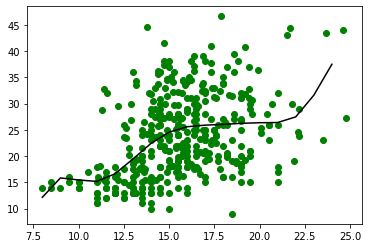

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(X, y, color='g')
xs = np.array(range(int(min(raw_dataset['Acceleration'])), int(max(raw_dataset['Acceleration']))+1))
plt.plot(xs, model.predict(xs.reshape(-1, 1)), color='k')

plt.show()

## Ridge regression

Una variante de está regresión lineal es conocida como *Ridge Regression*, la cuál añade un término de regularización que evita el *overfitting*. Esta regularización se ajusta asignando valores a un hiper-parámetro $\alpha$.

Realmente, el cambio se produce en el método que utiliza el modelo para realizar el ajuste de sus coeficientes, que ahora se convierte en un criterio de mínimos cuadrados pero con una regularización:

$$\min_{W} (W \cdot X - Y)^2 + \alpha \cdot ||W||_2^2$$

donde $W$ es la matriz de coeficientes $\beta_i$ del modelo multi-variable de regresión lineal.

In [ ]:
from sklearn.linear_model import Ridge
# Demo de Ridge regression

rid = Ridge(alpha=0)
rid.fit(X_train, Y_train)

mean_squared_error(Y_test, rid.predict(X_test), squared=False)

0.7251404861973341

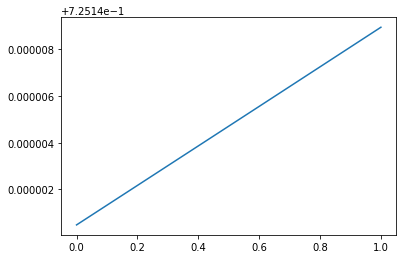

In [ ]:
alpha = np.arange(0.0, 1.1, step=0.2)
rmse = []
for a in alpha:
    rid = Ridge(alpha=a)
    rid.fit(X_train, Y_train)
    rmse.append(mean_squared_error(Y_test, rid.predict(X_test), squared=False))

plt.plot(alpha, rmse)

## Lasso

Otra variante de la regresión lineal se conoce como [Lasso](https://scikit-learn.org/stable/modules/linear_model.html#lasso). El Lasso es un modelo lineal que estima los coeficientes dispersos. Es útil en algunos contextos debido a su tendencia a preferir soluciones con menos coeficientes distintos de cero, reduciendo efectivamente el número de características de las que depende la solución dada.

Al igual que *Ridge*, añade un hiperparámetro para gestionar el sobre-entrenamiento (o *overfitting*).

Se busca, por tanto, resolver el siguiente problema de minimización:

$$\min_{W} \frac{1}{2n_{samples}} ||W \cdot X - Y||_2^2 + \alpha \cdot ||W||_1$$

El modelo está incluido en sklearn:

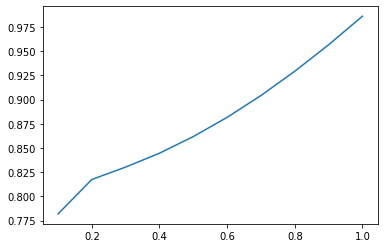

In [ ]:
from sklearn.linear_model import Lasso

alpha = np.arange(0.1, 1.1, step=0.1)
rmse = []
for a in alpha:
    rid = Lasso(alpha=a)
    rid.fit(X_train, Y_train)
    rmse.append(mean_squared_error(Y_test, rid.predict(X_test), squared=False))

plt.plot(alpha, rmse)

## Stochastic Gradient Descent

El último método de regresión que vamos a estudiar es el descenso de gradiente estocástico, o *Stochastic Gradient Descent (SGD)*. El método funciona como un descenso de gradiente básico con la única salvedad de que en *SGD* se calcula dicho gradiente con un único punto de datos en lugar de hacerlo con todos los puntos del conjunto de datos. Con esto conseguimos que, si bien el método necesita de más iteraciones para converger a un óptimo, el coste computacional de cada una de estas iteraciones es considerablemente inferior a una iteración del descenso de gradiente básico.

Es por ello que se recomienda este método de regresión lineal cuando se tienen conjunto de datos con muchas observaciones (generalmente más de 10k puntos de entrenamiento).

In [ ]:
from sklearn.linear_model import SGDRegressor
rng = np.random.RandomState(0)
n_samples = 100000000
n_features = 10
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

---

Creado por **Raúl Lara** (raul.lara@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">